<a href="https://colab.research.google.com/github/3333210108/yunisanovalinasinaga/blob/main/UAS_ANALITIKA_DATA_YUNISA_NOVALINA_(KELAS_C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

**Import Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

import pandas as pd mengimpor library pandas yang digunakan untuk manipulasi dan analisis data. Alias pd digunakan untuk memudahkan penggunaan fungsi dan objek dari library pandas.

import numpy as np mengimpor library numpy yang menyediakan fungsi matematika dan array. Alias np digunakan untuk memudahkan penggunaan fungsi dan objek dari library numpy.

import matplotlib.pyplot as plt mengimpor modul pyplot dari library matplotlib. Modul ini menyediakan antarmuka mirip MATLAB untuk membuat plot dan visualisasi data. Alias plt digunakan untuk memudahkan penggunaan fungsi dan objek dari modul pyplot.

import seaborn as sns mengimpor library seaborn. Seaborn adalah library yang dibangun di atas matplotlib dan menyediakan antarmuka yang lebih tinggi untuk membuat grafik statistik. Alias sns digunakan untuk memudahkan penggunaan fungsi dan objek dari library seaborn.

import math mengimpor library math yang menyediakan fungsi matematika dasar.

import datetime mengimpor library datetime yang menyediakan fungsi dan objek untuk memanipulasi tanggal dan waktu.

%matplotlib inline adalah perintah khusus dalam Jupyter Notebook yang memungkinkan tampilan plot yang dihasilkan oleh Matplotlib ditampilkan secara langsung di dalam notebook. Dengan menggunakan perintah ini, plot akan ditampilkan langsung di bawah sel kode yang menghasilkannya, tanpa perlu memanggil fungsi plt.show() secara eksplisit.

Secara singkat, kode ini mengimpor library yang umumnya digunakan dalam analisis dan visualisasi data di Python, serta memastikan tampilan plot ditampilkan secara langsung di dalam notebook

In [3]:
# https://drive.google.com/file/d/16XT6QzaU2P1XzB8ptuJGlJkMVVgoC7cH/view?usp=sharing

!gdown 18iEP3_YBB60z3_b8S38NkUkWSY8OQT7y

Downloading...
From: https://drive.google.com/uc?id=18iEP3_YBB60z3_b8S38NkUkWSY8OQT7y
To: /content/google.csv
100% 475k/475k [00:00<00:00, 143MB/s]


Untuk mendownload dataset dan juga mengakses nya dari google drive

In [4]:
train_data = pd.read_csv('google.csv')
train_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


Kode tersebut digunakan untuk membaca file CSV dengan nama 'google.csv' dan memuat datanya ke dalam sebuah pandas DataFrame yang disebut train_data
Fungsi pd.read_csv() dari library pandas digunakan untuk membaca file CSV dan mengonversinya menjadi sebuah DataFrame. Di sini, file 'google.csv' akan dibaca dan data yang ada di dalamnya akan dimuat ke dalam DataFrame yang ditugaskan ke variabel train_data.
Setelah data dimuat, baris berikutnya:
Digunakan untuk menampilkan lima baris pertama dari DataFrame train_data. Fungsi head() digunakan untuk melihat sebagian data awal secara default. Jika ingin menampilkan sejumlah baris tertentu, dapat menyertakan argumen integer di dalam fungsi head() (misalnya head(10) untuk menampilkan sepuluh baris pertama).

Check missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


Kode train_data.info() digunakan untuk mendapatkan informasi mengenai struktur data dalam DataFrame train_data. Ketika kode ini dijalankan, akan ditampilkan beberapa informasi penting tentang DataFrame, termasuk:

Jumlah baris dan kolom dalam DataFrame.
Nama dan tipe data dari setiap kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Tipe data keseluruhan dari DataFrame.
Dengan menggunakan train_data.info(), Anda dapat melihat ringkasan singkat tentang dataset yang sedang digunakan, termasuk tipe data kolom, apakah ada nilai yang hilang (missing values), dan jumlah total baris dan kolom. Informasi ini sangat berguna untuk memahami struktur data dan membantu dalam tahap eksplorasi dan persiapan data sebelum melakukan analisis lebih lanjut.

Check statistic vales for every features

In [6]:
train_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


Kode train_data.describe() digunakan untuk menghasilkan ringkasan statistik dari kolom-kolom numerik dalam DataFrame train_data. Ketika kode ini dijalankan, akan ditampilkan beberapa statistik deskriptif penting, termasuk:

Jumlah data (count): Jumlah nilai non-null (non-missing) yang ada dalam setiap kolom.
Rata-rata (mean): Nilai rata-rata dari setiap kolom.
Standar deviasi (standard deviation): Ukuran dispersi atau variasi dari setiap kolom.
Nilai minimum (minimum): Nilai terkecil dalam setiap kolom.
Kuartil (quartiles): Nilai yang membagi data menjadi empat kelompok yang sama, yaitu kuartil pertama (25%), kuartil kedua (median atau 50%), dan kuartil ketiga (75%).
Nilai maksimum (maximum): Nilai terbesar dalam setiap kolom.
Melalui train_data.describe(), Anda dapat melihat gambaran statistik dasar dari data numerik dalam DataFrame, termasuk ukuran tendensi sentral, variabilitas, dan distribusi data. Ini membantu memahami karakteristik umum dari data, menemukan potensi outlier, serta memperoleh wawasan awal tentang sebaran dan pola data.

Handle datetime data for time series

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


Kode yang diberikan digunakan untuk mengubah kolom 'Date' dalam DataFrame train_data menjadi tipe data datetime dan mengatur kolom tersebut sebagai indeks utama (index) dari DataFrame.
pd.to_datetime() digunakan untuk mengonversi nilai dalam kolom 'Date' menjadi tipe data datetime yang disediakan oleh pandas. Setelah itu, hasil konversi tersebut ditugaskan kembali ke kolom 'Date' dalam DataFrame train_data
set_index() digunakan untuk mengatur kolom 'Date' sebagai indeks utama (index) dari DataFrame train_data. Dengan menggunakan inplace=True, perubahan ini diterapkan secara langsung pada DataFrame train_data tanpa perlu menugaskan hasilnya ke variabel baru.
Baris ini digunakan untuk menampilkan lima baris pertama dari DataFrame train_data setelah perubahan indeks dilakukan. Dengan mengatur kolom 'Date' sebagai indeks, baris ini memungkinkan kita melihat data yang diindeks berdasarkan tanggal, yang berguna dalam analisis berkelanjutan atau visualisasi berdasarkan urutan waktu.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

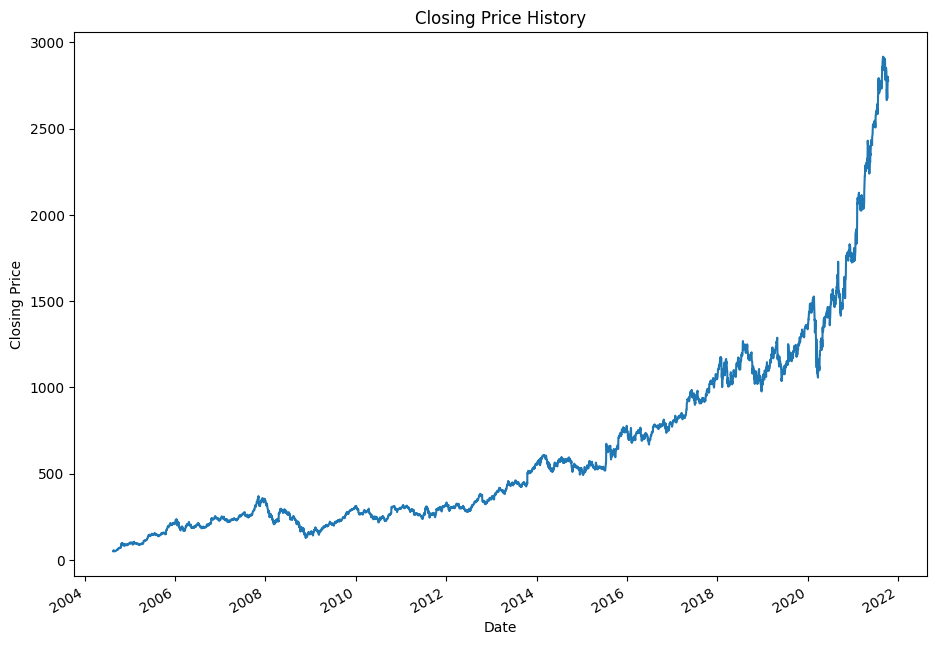

In [8]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Baris pertama mengatur ukuran (width, height) dari plot menggunakan plt.figure(figsize=(11, 8)). Angka 11 dan 8 dalam parameter figsize menentukan lebar dan tinggi plot dalam satuan inci.
Baris selanjutnya memanggil metode plot() pada kolom 'Adj Close' dari DataFrame train_data. Ini akan menghasilkan plot garis dengan sumbu x yang merupakan indeks (tanggal) dan sumbu y yang merupakan nilai 'Adj Close'
Baris selanjutnya menambahkan judul pada plot dengan menggunakan plt.title('Closing Price History'), menambahkan label pada sumbu x dengan plt.xlabel('Date'), dan menambahkan label pada sumbu y dengan plt.ylabel('Closing Price'). Ini memberikan konteks dan deskripsi pada plot.
Baris selanjutnya digunakan untuk menampilkan plot yang telah dibuat. plt.show() akan mengeluarkan plot ke dalam jendela plot terpisah.

Secara keseluruhan, kode ini membentuk plot dari data harga penutupan ('Adj Close') dari DataFrame train_data dengan judul, label sumbu, dan ukuran plot yang sudah ditentukan.

<Figure size 1600x800 with 0 Axes>

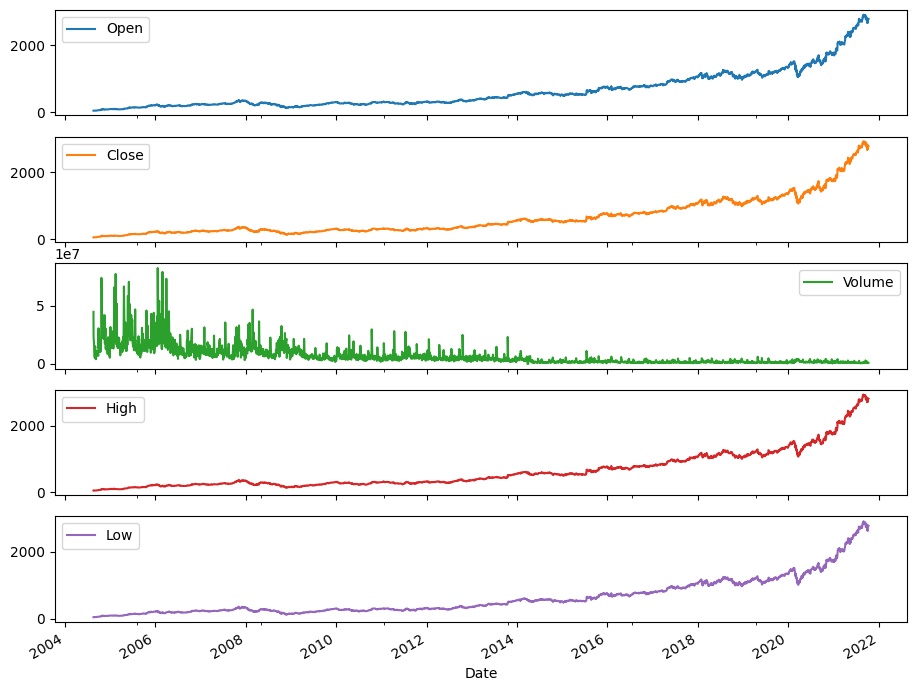

In [9]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

plt.figure(figsize=(16, 8)) mengatur ukuran gambar yang akan menampung beberapa plot menjadi 16 inci lebar dan 8 inci tinggi.
cols = ['Open', 'Close', 'Volume', 'High', 'Low'] mendefinisikan kolom-kolom yang akan digunakan untuk membuat plot. Kolom-kolom yang dipilih adalah 'Open', 'Close', 'Volume', 'High', dan 'Low'.
axes = train_data[cols].plot(figsize=(11, 9), subplots=True) memanggil metode plot() pada DataFrame train_data dengan menggunakan hanya kolom-kolom yang telah ditentukan sebelumnya. figsize=(11, 9) mengatur ukuran plot untuk setiap subplot dalam gambar. subplots=True menginstruksikan pandas untuk membuat plot dalam subplot terpisah untuk setiap kolom.
plt.show() menampilkan gambar dengan plot-plot yang telah dibuat.
Kode ini memungkinkan untuk memvisualisasikan beberapa kolom dari DataFrame train_data secara bersamaan dalam satu gambar dengan subplot terpisah untuk masing-masing kolom. Ini dapat memberikan pemahaman visual yang lebih baik tentang hubungan dan pola antara kolom-kolom yang dipilih dalam dataset.

In [10]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 menghitung persentase perubahan harga tertinggi dan terendah (High-Low) relatif terhadap harga terendah (Low). Persentase perubahan ini menggambarkan volatilitas harga atau jangkauan harga dalam satu periode. Kolom baru 'HL_PCT' akan berisi nilai persentase perubahan ini.

train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 menghitung persentase perubahan harga penutupan (Close) relatif terhadap harga pembukaan (Open). Persentase perubahan ini menggambarkan perubahan harga dari pembukaan ke penutupan dalam satu periode. Kolom baru 'PCT_change' akan berisi nilai persentase perubahan ini

In [11]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']] memilih kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari DataFrame train_data menggunakan indexing dengan menggunakan double brackets [['...']].

In [12]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

216


<ipython-input-12-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


forecast_out = int(math.ceil(0.05 * len(df))) menghitung jumlah baris data yang akan diprediksi atau diklasifikasikan. Dalam kode ini, 5% dari total baris data dalam DataFrame df akan diambil untuk keperluan prediksi atau klasifikasi. Angka ini dihitung dengan mengalikan 0.05 dengan panjang (jumlah baris) DataFrame df, kemudian menggunakan math.ceil() untuk membulatkan ke atas ke bilangan integer terdekat.

df['label'] = df['Adj Close'].shift(-forecast_out) membuat kolom baru 'label' dalam DataFrame df. Kolom ini akan berisi nilai 'Adj Close' yang telah digeser ke atas (dalam hal ini ke baris sebelumnya) sebanyak forecast_out baris. Hal ini dilakukan untuk menghubungkan data 'Adj Close' yang ada saat ini dengan nilai 'Adj Close' di masa depan yang akan diprediksi atau diklasifikasikan. Dengan melakukan pergeseran negatif (-forecast_out), kita mengaitkan nilai 'Adj Close' saat ini dengan nilai 'Adj Close' di masa depan yang berjarak forecast_out baris dari baris saat ini.

Dengan menambahkan kolom 'label' ini, kita dapat menggunakan nilainya untuk melakukan prediksi atau klasifikasi data menggunakan algoritma machine learning atau metode lainnya. Kolom 'label' ini akan berisi nilai-nilai yang akan diprediksi atau diklasifikasikan dalam konteks masalah yang spesifik.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

StandardScaler digunakan untuk melakukan penskalaan data dengan mengubah fitur-fitur menjadi memiliki rata-rata nol dan variansi unit. Ini sering digunakan dalam pra-pemrosesan data sebelum membangun model regresi.

LinearRegression adalah kelas yang mewakili model regresi linier. Model ini digunakan untuk mempelajari hubungan linier antara fitur-fitur dan target yang kontinu.

Ridge adalah kelas yang mewakili model regresi Ridge. Model ini merupakan variasi dari regresi linier yang memperkenalkan penalti L2 (norma kuadrat Euclidean) pada koefisien untuk mengurangi overfitting.

RandomForestRegressor adalah kelas yang mewakili model regresi menggunakan metode ensemble berdasarkan pohon keputusan. Model ini membangun beberapa pohon keputusan secara acak dan menggabungkan prediksi mereka untuk menghasilkan prediksi akhir.

SVR (Support Vector Regressor) adalah kelas yang mewakili model regresi menggunakan metode Support Vector Machines (SVM). Model ini digunakan untuk mempelajari hubungan non-linier antara fitur-fitur dan target.

train_test_split adalah fungsi yang digunakan untuk membagi data menjadi subset pelatihan dan subset pengujian. Fungsi ini memungkinkan kita untuk membagi data dengan proporsi yang ditentukan dan memastikan bahwa subset pelatihan dan pengujian memiliki distribusi yang serupa.

mean_squared_log_error adalah metrik evaluasi yang digunakan untuk mengukur kesalahan logaritmik rata-rata antara logaritma prediksi dan logaritma nilai sebenarnya. Metrik ini berguna ketika target memiliki skala yang luas dan memiliki distribusi yang tidak simetris.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [14]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-14-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


scaler = StandardScaler() membuat objek StandardScaler yang akan digunakan untuk melakukan penskalaan data.

X = np.array(df.drop(['label'], 1)) mengambil fitur-fitur dari DataFrame df ke dalam array X. Fitur-fitur ini akan digunakan sebagai input untuk penskalaan data.

scaler.fit(X) menggunakan objek StandardScaler untuk mempelajari rata-rata dan variansi fitur-fitur dalam X. Ini digunakan untuk menyesuaikan penskalaan data berdasarkan statistik dari fitur-fitur tersebut.

X = scaler.transform(X) mengubah dan menyekalakan data fitur-fitur dalam X berdasarkan transformasi yang telah dipelajari dari scaler.fit(). Hasilnya adalah X yang telah disesuaikan secara skala.

In [15]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Kode tersebut digunakan untuk membagi data yang telah diolah menjadi dua subset terpisah, yaitu data yang akan digunakan untuk melatih model (X) dan data yang akan diprediksi (X_Predictions).

X_Predictions = X[-forecast_out:] memilih forecast_out baris terakhir dari data yang telah diolah, yang akan digunakan sebagai data yang akan diprediksi. Data ini disimpan dalam variabel X_Predictions.

X = X[:-forecast_out] memilih semua baris kecuali forecast_out baris terakhir dari data yang telah diolah, yang akan digunakan sebagai data yang akan dilatih. Data ini disimpan kembali dalam variabel X.

Dengan membagi data menjadi subset pelatihan dan subset prediksi, kita dapat menggunakan subset pelatihan (X) untuk melatih model dan subset prediksi (X_Predictions) untuk memprediksi nilai di masa depan menggunakan model yang telah dilatih. Ini adalah langkah penting dalam proses pemodelan dan prediksi menggunakan algoritma machine learning, di mana data yang diketahui digunakan untuk melatih model dan data yang tidak diketahui digunakan untuk membuat prediksi

In [16]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-16-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


df.dropna(inplace=True) digunakan untuk menghapus baris yang mengandung nilai-nilai yang hilang atau NaN (Not a Number) dari DataFrame df. Dengan menggunakan inplace=True, perubahan ini diterapkan langsung pada DataFrame df tanpa perlu menyimpan hasilnya ke variabel baru.

Baris dengan nilai-nilai yang hilang dapat mempengaruhi analisis atau pemodelan yang akan dilakukan, terutama jika nilai target yang hilang. Dengan menghapus baris-baris ini, kita memastikan bahwa data yang digunakan tidak mengandung nilai yang hilang, sehingga menjaga integritas dan kualitas analisis atau pemodelan yang akan dilakukan.

y = np.array(df['label']) mengambil kolom 'label' dari DataFrame df dan menyimpannya dalam array y. Array ini akan digunakan sebagai target atau variabel dependen dalam pemodelan atau analisis yang akan dilakukan. Dalam konteks regresi, y umumnya berisi nilai-nilai yang akan diprediksi atau diklasifikasikan.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) membagi data fitur X dan target y menjadi subset pelatihan dan pengujian dengan rasio 80:20. Dalam hal ini, 80% data digunakan untuk pelatihan (subset pelatihan) dan 20% data digunakan untuk pengujian (subset pengujian).

X adalah data fitur yang telah diolah dan akan digunakan sebagai input dalam pemodelan.

y adalah data target yang akan diprediksi atau diklasifikasikan.

test_size=0.2 menentukan ukuran subset pengujian sebesar 20% dari total data.

random_state=42 digunakan untuk mengontrol pemilihan data yang acak. Mengatur random_state ke suatu angka tertentu memastikan bahwa pemilihan data yang acak akan konsisten setiap kali kode dijalankan.

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

lr = LinearRegression() membuat objek model regresi linier (LinearRegression).

lr.fit(X_train, y_train) menggunakan metode fit() pada objek model untuk melatih model dengan menggunakan subset pelatihan (X_train dan y_train). Ini berarti model akan mencoba mempelajari hubungan linier antara fitur-fitur dalam X_train dengan target y_train.

lr_confidence = lr.score(X_test, y_test) menggunakan metode score() pada objek model untuk menguji kinerja model pada subset pengujian (X_test dan y_test). Metode score() menghitung koefisien determinasi (R-squared) yang mengindikasikan sejauh mana model dapat menjelaskan variasi dalam data pengujian. Hasilnya disimpan dalam variabel lr_confidence.

In [19]:
lr_confidence

0.9165461688766906

lr_confidence adalah variabel yang menyimpan skor koefisien determinasi (R-squared) dari model regresi linier (LinearRegression) pada subset pengujian (X_test dan y_test).

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

rf = RandomForestRegressor() membuat objek model regresi acak (RandomForestRegressor).

rf.fit(X_train, y_train) menggunakan metode fit() pada objek model untuk melatih model dengan menggunakan subset pelatihan (X_train dan y_train). Model regresi acak akan membangun banyak pohon keputusan secara acak dan menggabungkan hasil prediksi dari semua pohon untuk menghasilkan prediksi akhir.

rf_confidence = rf.score(X_test, y_test) menggunakan metode score() pada objek model untuk menguji kinerja model pada subset pengujian (X_test dan y_test). Metode score() menghitung koefisien determinasi (R-squared) yang mengindikasikan sejauh mana model regresi acak dapat menjelaskan variasi dalam data pengujian. Nilai rf_confidence merupakan koefisien determinasi dari model regresi acak yang mengindikasikan seberapa baik model dapat memprediksi nilai target (y_test) berdasarkan fitur-fitur (X_test) pada data pengujian.

In [21]:
rf_confidence

0.9617224650940234

rf_confidence adalah nilai koefisien determinasi yang mengindikasikan seberapa baik model regresi acak dapat memprediksi target pada data pengujian. Semakin tinggi nilai rf_confidence, semakin baik kemampuan model dalam menjelaskan variasi dalam data pengujian dan memprediksi target dengan akurasi yang lebih tinggi.

In [22]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-22-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

last_date = df.index[-1] mengambil tanggal terakhir dalam dataset sebagai last_date.

last_unix = last_date.timestamp() mengonversi last_date menjadi waktu dalam detik dengan menggunakan metode timestamp().

one_day = 86400 mendefinisikan konstanta one_day sebagai jumlah detik dalam satu hari (86400 detik).

next_unix = last_unix + one_day menghitung waktu dalam detik untuk hari berikutnya dengan menambahkan one_day ke last_unix.

forecast_set = rf.predict(X_Predictions) melakukan prediksi dengan menggunakan model regresi acak (rf) terhadap data X_Predictions. Hasil prediksi disimpan dalam forecast_set.

df['Forecast'] = np.nan menginisialisasi kolom 'Forecast' dalam DataFrame df dengan nilai NaN.

Melalui loop for, untuk setiap nilai dalam forecast_set:

next_date = datetime.datetime.fromtimestamp(next_unix) mengonversi waktu dalam detik next_unix menjadi objek datetime dengan menggunakan fromtimestamp() dari modul datetime. Ini akan memberikan tanggal untuk hari berikutnya.
next_unix += 86400 menambahkan one_day ke next_unix untuk mendapatkan waktu dalam detik untuk hari berikutnya.
df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i] menambahkan baris baru ke DataFrame df dengan indeks next_date dan nilai i pada kolom 'Forecast'. Nilai lainnya dalam baris tersebut diisi dengan NaN.
Dengan melakukan langkah-langkah di atas, data hasil prediksi (forecast_set) ditambahkan ke DataFrame df pada kolom 'Forecast' untuk hari-hari berikutnya setelah tanggal terakhir dalam dataset. Ini memungkinkan kita untuk memvisualisasikan dan menganalisis perbedaan antara data aktual dan data prediksi.

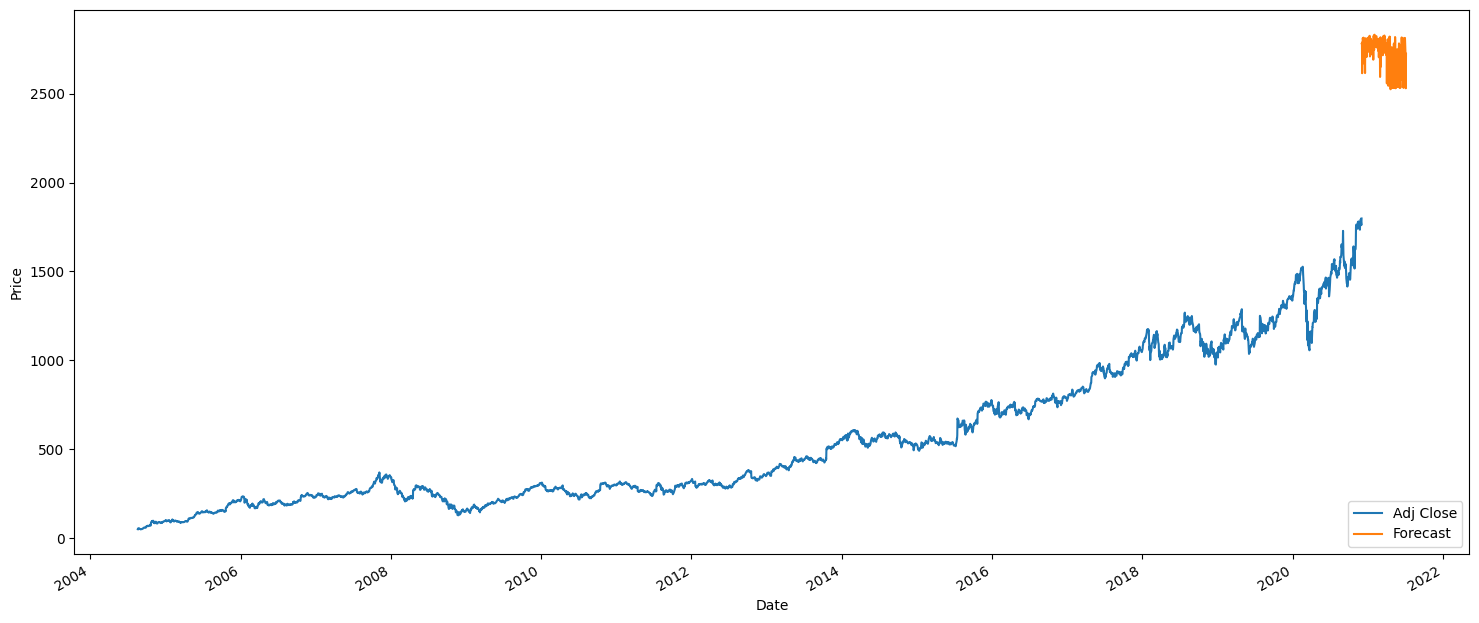

In [23]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(18, 8)) digunakan untuk mengatur ukuran gambar plot menjadi 18x8 inci, sehingga grafik memiliki ukuran yang lebih besar.

df['Adj Close'].plot() memplot data aktual (Adj Close) sebagai garis pada grafik.

df['Forecast'].plot() memplot data hasil prediksi (Forecast) sebagai garis pada grafik. Data hasil prediksi ini dihasilkan dari model yang telah dilatih sebelumnya.

plt.legend(loc=4) menampilkan legenda pada grafik untuk membedakan antara data aktual dan data hasil prediksi. loc=4 mengatur posisi legenda di bagian kanan bawah grafik.

plt.xlabel('Date') menambahkan label pada sumbu x dengan teks "Date".

plt.ylabel('Price') menambahkan label pada sumbu y dengan teks "Price".

plt.show() menampilkan grafik secara keseluruhan.